Note: The code has been executed after the presentation was made, numbers may thus vary from presentation material.

# Exploratory Data Analysis

In [41]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [42]:
#import data
dfall = pd.read_csv('CreditCardFraud_AllData.csv')
df1 = pd.read_csv('CreditCardFraud_1.csv')
df2 = pd.read_csv('CreditCardFraud_2.csv')
df3 = pd.read_csv('CreditCardFraud_3.csv')
df4 = pd.read_csv('CreditCardFraud_4.csv')
df5 = pd.read_csv('CreditCardFraud_5.csv')

In [43]:
#take a look at the data - choose a dataframe to look at
print(df3.head())
print(df3.shape)

   Time  Amount  Is.Fraud        V1        V2        V3        V4        V5  \
0    13    0.89     False -0.436905  0.918966  0.924591 -0.727219  0.915679   
1    82    5.90     False -0.888004  0.913670  1.146088  0.656290  0.677272   
2    89   37.13     False -0.589856  0.933070 -0.268073  0.125245  2.396992   
3   399   15.19     False  1.091666  0.068682  1.230334  2.554474 -0.454169   
4   421   12.41     False -1.397776  0.004573  2.528964  0.648279 -0.196625   

         V6        V7    ...          V19       V20       V21       V22  \
0 -0.127867  0.707642    ...     0.025436 -0.047021 -0.194796 -0.672638   
1 -0.326211  0.888811    ...     0.852984  0.142757  0.107833  0.661993   
2  3.877945  0.189985    ...     1.424510  0.401336 -0.154397 -0.174834   
3  0.915781 -0.701016    ...    -0.990732 -0.216638 -0.098440 -0.178428   
4  0.163190 -0.278296    ...     0.524410  0.056481 -0.087222  0.150044   

        V23       V24       V25       V26       V27       V28  
0 -0.15685

In [44]:
#check out the column names
print(dfall.columns)

Index(['Time', 'Amount', 'Is.Fraud', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')


False    284315
True        492
Name: Is.Fraud, dtype: int64


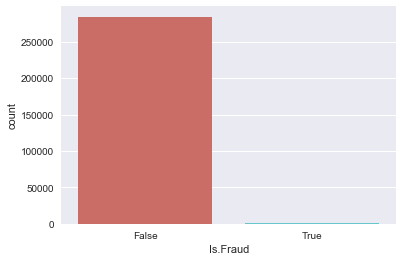

In [45]:
#count how many are of each class in original dataset: Fraud or not fraud
fraud_class = dfall['Is.Fraud'].value_counts()
print(fraud_class)
sns.countplot(x='Is.Fraud',data=dfall, palette='hls')

In [46]:
#find percentage of fraud/not fraud cases in the original dataset
print('Not fraud:', round(dfall['Is.Fraud'].value_counts()[0]/len(dfall) * 100,2))
print('Fraud:', round(dfall['Is.Fraud'].value_counts()[1]/len(dfall) * 100,2))

Not fraud: 99.83
Fraud: 0.17


False    4508
True      492
Name: Is.Fraud, dtype: int64


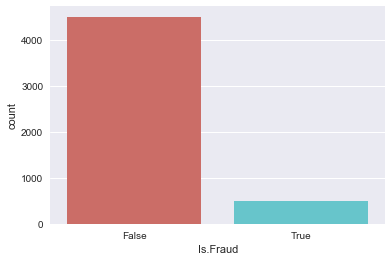

In [47]:
#count how many are of each class in subdataframe: Fraud or not fraud
class_fraud = df3['Is.Fraud'].value_counts()
print(class_fraud)
sns.countplot(x='Is.Fraud',data=df3, palette='hls')

In [48]:
#find percentage of fraud/not fraud cases in the subdataset
print('Not fraud:', round(df3['Is.Fraud'].value_counts()[0]/len(df3) * 100,2))
print('Fraud:', round(df3['Is.Fraud'].value_counts()[1]/len(df3) * 100,2),)

Not fraud: 90.16
Fraud: 9.84


In [49]:
#check for null values
df3.isnull().sum().max()

0

In [50]:
#check for stats about the variables
df3.describe()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,93793.844800,87.616238,-0.441065,0.391207,-0.689673,0.449368,-0.315963,-0.132320,-0.565869,0.044809,...,0.057555,0.037399,0.057844,-0.007837,0.000588,-0.010667,-0.005473,0.007151,0.018784,0.015622
std,47464.044369,215.117963,3.073766,2.202979,3.344737,2.085258,2.236770,1.433974,2.972431,2.470608,...,0.928045,0.777813,1.446733,0.835650,0.671667,0.596025,0.546048,0.471674,0.551305,0.301861
min,13.000000,0.000000,-30.552380,-20.949142,-31.103685,-4.655639,-22.105532,-6.406267,-43.557242,-41.044261,...,-3.681904,-11.301771,-22.797604,-8.887017,-19.254328,-2.425787,-4.781606,-1.664130,-7.263482,-2.748073
25%,53768.500000,4.842500,-1.111568,-0.543870,-1.243362,-0.766730,-0.828265,-0.866810,-0.738763,-0.196364,...,-0.453115,-0.202001,-0.228474,-0.554973,-0.166869,-0.361035,-0.325047,-0.312071,-0.067992,-0.052506
50%,84317.500000,20.410000,-0.169319,0.167767,0.018644,0.142557,-0.124561,-0.337693,-0.033252,0.050484,...,0.035202,-0.046043,-0.010311,-0.003851,-0.010270,0.028144,0.013198,-0.033822,0.009217,0.014932
75%,138639.250000,82.137500,1.254644,1.008566,0.918051,1.083073,0.584521,0.330710,0.527875,0.404370,...,0.523097,0.176730,0.225273,0.540088,0.160085,0.417500,0.349868,0.251877,0.126518,0.095771
max,172743.000000,4487.490000,2.356745,22.057729,3.748614,12.114672,11.095089,13.470790,11.217637,20.007208,...,5.228342,11.059004,27.202839,8.361985,8.178541,3.658746,3.265186,3.067907,3.479621,6.582617


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


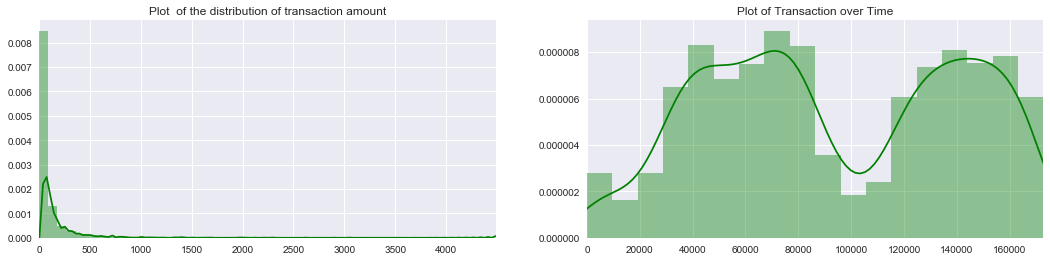

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

#get the values from the columns amount and time
amounts = df3['Amount'].values
times = df3['Time'].values

#Create plot for distribution of amount
sns.distplot(amounts, ax=ax[0], color='g')
ax[0].set_title('Plot  of the distribution of transaction amount', fontsize=12)
ax[0].set_xlim([min(amounts), max(amounts)])

#Create plot for transacion through time
sns.distplot(times, ax=ax[1], color='g')
ax[1].set_title('Plot of Transaction over Time', fontsize=12)
ax[1].set_xlim([min(times), max(times)])

plt.show()

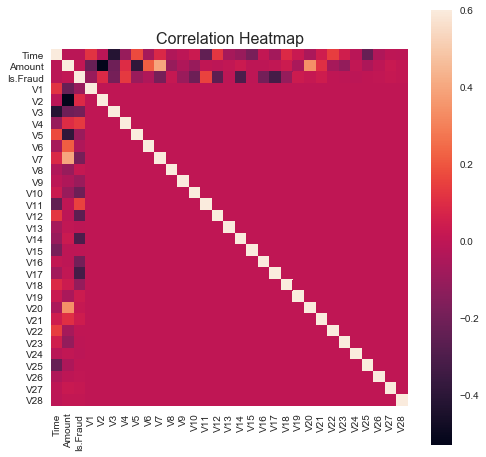

In [52]:
#create correlation heatmap for full dataframe
correlation = dfall.corr()
f , ax = plt.subplots(figsize = (8,8)) 
plt.title('Correlation Heatmap',y=1,size=16) 
sns.heatmap(correlation, square = True, vmax=0.6)

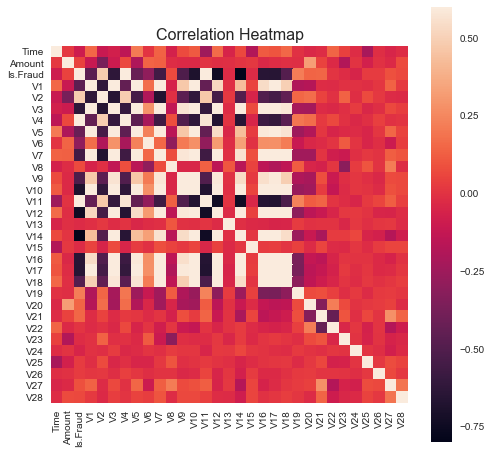

In [53]:
#create correlation heatmap for sub-dataframe
correlation = df3.corr()
f , ax = plt.subplots(figsize = (8,8)) 
plt.title('Correlation Heatmap',y=1,size=16) 
sns.heatmap(correlation, square = True, vmax=0.6)

In [54]:
#want to find the features which have the strongest correlation with fraud
correlation = df3.corr()['Is.Fraud']

#Make a list of the features which have a correlation with absolute value larger than 0.5 to list out
features_list = correlation[abs(correlation) > 0.5].sort_values(ascending=False)
print("There is {} values which are notably correlated with Is.Fraud:\n{}".format(len(features_list), features_list))

There is 11 values which are notably correlated with Is.Fraud:
Is.Fraud    1.000000
V11         0.668056
V4          0.648455
V9         -0.511484
V7         -0.556084
V3         -0.626626
V16        -0.650123
V17        -0.655595
V10        -0.686674
V12        -0.739767
V14        -0.799261
Name: Is.Fraud, dtype: float64


# Feature selection and model 1: Based on correlated features

In [55]:
# Need to transform the data in the columns Time and Amount for the dataframes we will use

std_scaler = StandardScaler()

dfall['scaled_amount'] = std_scaler.fit_transform(dfall['Amount'].values.reshape(-1,1))
dfall['scaled_time'] = std_scaler.fit_transform(dfall['Time'].values.reshape(-1,1))
dfall.drop(['Time','Amount'], axis=1, inplace=True)

df3['scaled_amount'] = std_scaler.fit_transform(df3['Amount'].values.reshape(-1,1))
df3['scaled_time'] = std_scaler.fit_transform(df3['Time'].values.reshape(-1,1))
df3.drop(['Time','Amount'], axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [56]:
from sklearn.utils import shuffle

#shuffle data (will give different results when training model as test/train sets are different from time to time)
df3 = shuffle(df3)
print(df3.head())

      Is.Fraud        V1        V2        V3        V4        V5        V6  \
3790     False -0.608866 -0.298869  0.454435 -3.006084  1.965265  3.973692   
2909     False  1.688770 -1.297159 -0.516220  0.310912 -0.616599  1.141672   
523      False -1.358148  0.864849  1.926861 -0.265291  0.495505 -0.734547   
1824     False  1.122866 -1.855822  0.207881 -1.322298 -1.711198 -0.265297   
1167     False  0.847556 -0.338382 -0.191249  0.644180 -0.183540 -0.714065   

            V7        V8        V9     ...            V21       V22       V23  \
3790 -0.563437  1.081659 -1.177641     ...       0.339505  0.767996 -0.389830   
2909 -0.997308  0.460332  1.790684     ...      -0.144869 -0.513232  0.151083   
523   1.174921 -0.704125  0.204974     ...      -0.412065 -0.309994  0.000949   
1824 -1.010876 -0.114408 -1.477658     ...       0.014004 -0.078305 -0.295552   
1167  0.632148 -0.252654 -0.251573     ...      -0.230173 -1.113621 -0.005678   

           V24       V25       V26       V27

In [57]:
# Extract the columns we want to investigate based on the correlation on the dataframes we are working on
names = ['Is.Fraud','V11', 'V4','V9','V7', 'V3', 'V16','V17','V10', 'V12','V14']
df_selected3 = pd.DataFrame(df3, columns=names)

In [58]:
print(df_selected3.head())

      Is.Fraud       V11        V4        V9        V7        V3       V16  \
3790     False -0.207876 -3.006084 -1.177641 -0.563437  0.454435  1.010120   
2909     False -0.623091  0.310912  1.790684 -0.997308 -0.516220  0.440454   
523      False  1.903485 -0.265291  0.204974  1.174921  1.926861  0.008255   
1824     False -1.358907 -1.322298 -1.477658 -1.010876  0.207881  0.150753   
1167     False  0.059191  0.644180 -0.251573  0.632148 -0.191249 -0.250848   

           V17       V10       V12       V14  
3790  0.069010 -0.250402 -0.961545 -0.386138  
2909 -0.506944 -0.074626  0.309104 -0.259892  
523  -0.948021  1.323661  0.705287 -0.591608  
1824  0.108859  1.340665 -1.479073 -0.382944  
1167  0.021733 -0.201071  0.506093  0.507920  


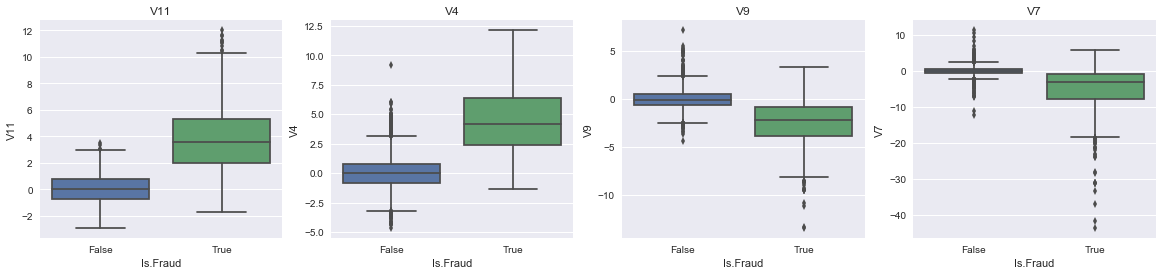

In [59]:
#plot bloxplots for 4 at a time
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Is.Fraud", y="V11", data=df_selected3, ax=axes[0])
axes[0].set_title('V11')

sns.boxplot(x="Is.Fraud", y="V4", data=df_selected3, ax=axes[1])
axes[1].set_title('V4')

sns.boxplot(x="Is.Fraud", y="V9", data=df_selected3, ax=axes[2])
axes[2].set_title('V9')

sns.boxplot(x="Is.Fraud", y="V7", data=df_selected3, ax=axes[3])
axes[3].set_title('V7')

plt.show()

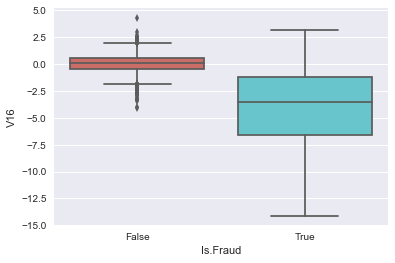

In [60]:
#One boxplot with colors to match fraud vs not fraud plot
sns.boxplot(x='Is.Fraud', y='V16', data=df_selected3, palette='hls')

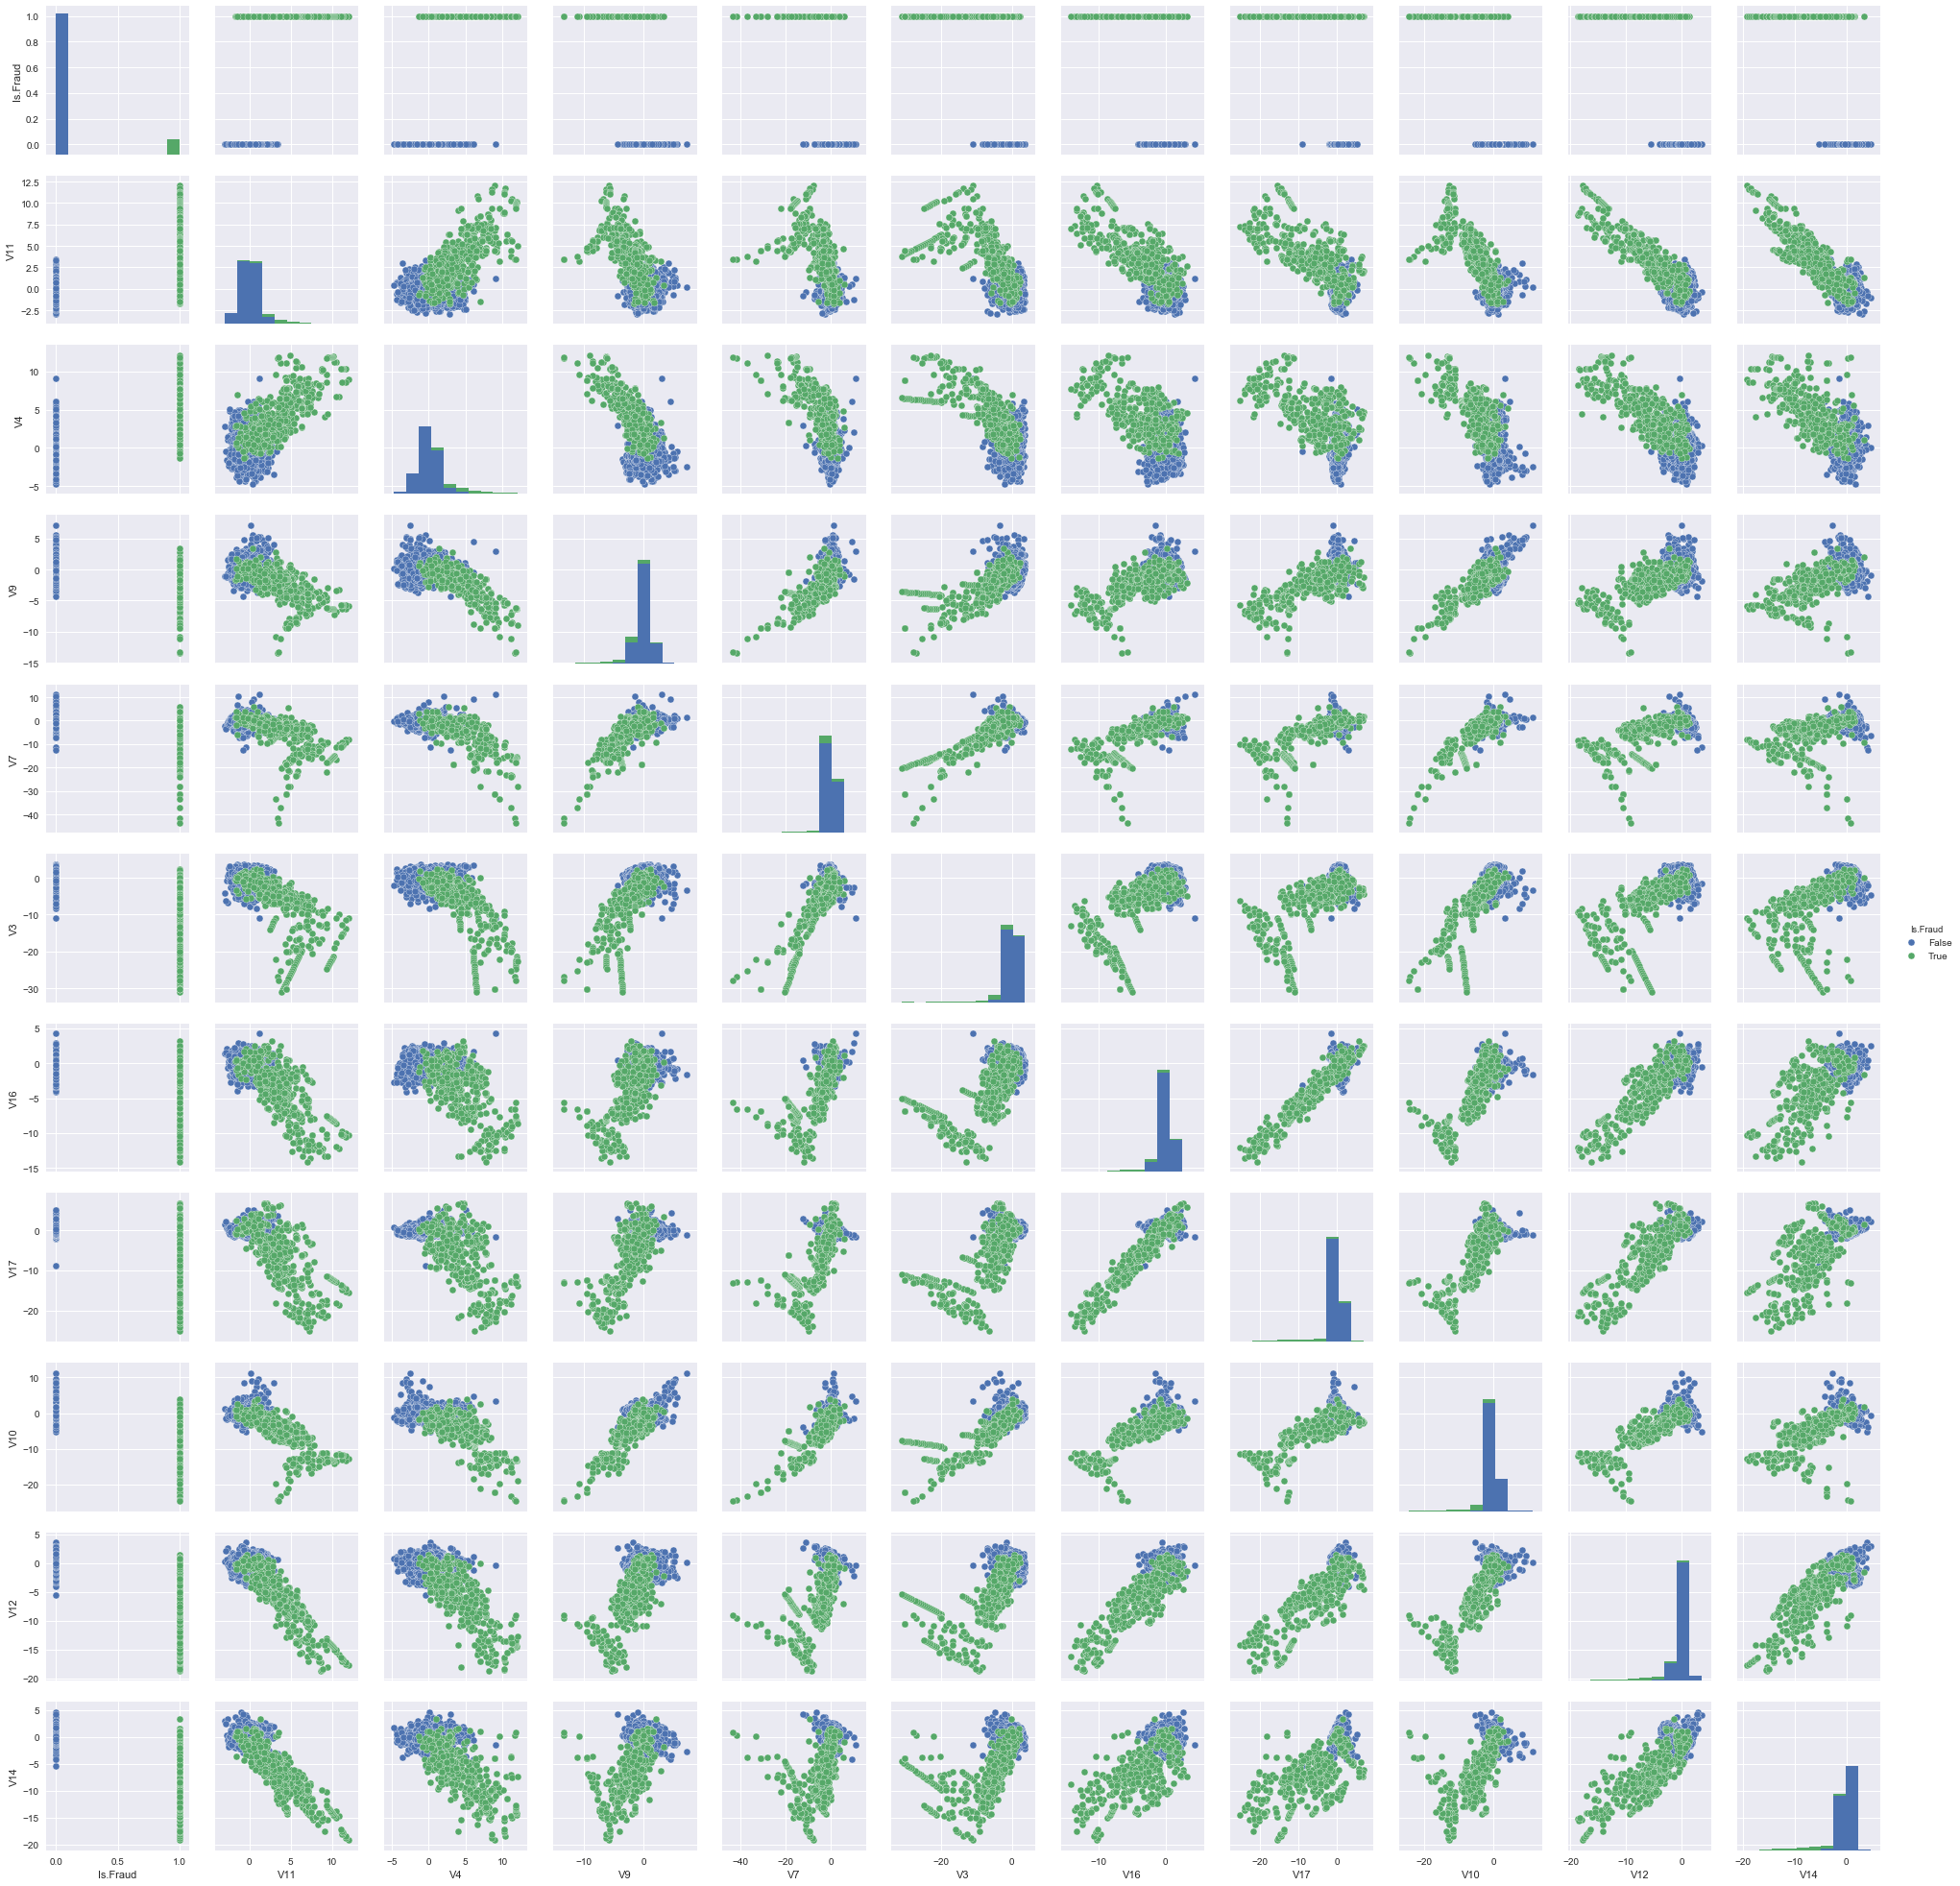

In [22]:
#pairplot to investigate relationships between variables
sns.set()
sns.pairplot(df_selected3[names], hue="Is.Fraud")
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


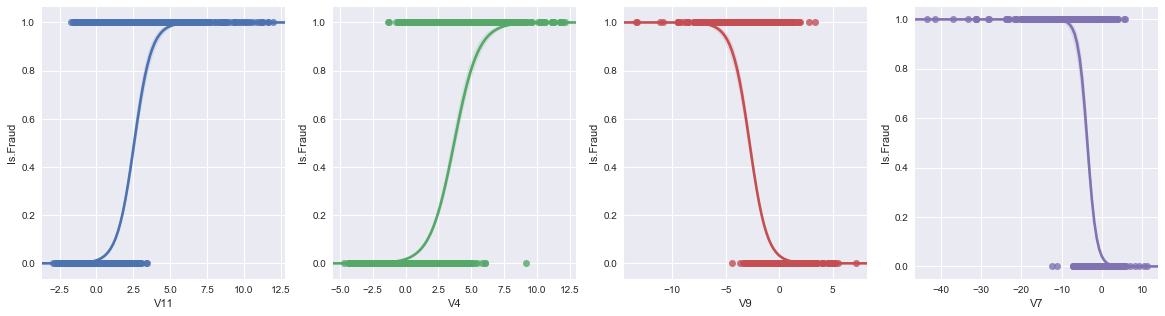

In [23]:
#Look at logisitc model for one variable at a time
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
         
plot1 = pd.concat([df_selected3[names[1]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[1],y = names[0],data = plot1, scatter= True, logistic=True, ax=ax[0]) 
         
plot1 = pd.concat([df_selected3[names[2]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[2],y = names[0],data = plot1, scatter= True, logistic=True, ax=ax[1])

plot1 = pd.concat([df_selected3[names[3]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[3],y = names[0], data = plot1, scatter= True, logistic=True, ax=ax[2])

plot1 = pd.concat([df_selected3[names[4]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[4],y = names[0], data = plot1, scatter= True, logistic=True, ax=ax[3])

# Build model using df3 and assess

In [61]:
#Choose the columns we want to use to predict Outcome with 
train_cols = names[1:]

#We use the logit function as we are doing logistic regression to look at p-values
#Here we are fitting the model using all the data in df3 (not like later)
logit = sm.Logit(df_selected3['Is.Fraud'], df_selected3[train_cols]) 
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.630819
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               Is.Fraud   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4990
Method:                           MLE   Df Model:                            9
Date:                Tue, 15 Jan 2019   Pseudo R-squ.:                 -0.9618
Time:                        13:04:10   Log-Likelihood:                -3154.1
converged:                       True   LL-Null:                       -1607.8
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V11            0.1428      0.034      4.202      0.000       0.076       0.209
V4             0.0933      0

In [62]:
# separate dependant variable and features for prediciton
X = df_selected3.iloc[:, df_selected3.columns != 'Is.Fraud']
y = df_selected3.iloc[:, df_selected3.columns == 'Is.Fraud']

In [63]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

#split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Transactions train dataset: ", len(X_train))
print("Transactions test dataset: ", len(X_test))
print("Total transactions: ", len(X_train)+len(X_test))

Transactions train dataset:  3500
Transactions test dataset:  1500
Total transactions:  5000


In [64]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy: 0.99


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[1361    3]
 [  16  120]]


Text(0.5,257.44,'Predicted label')

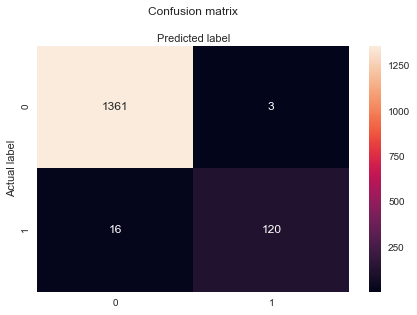

In [66]:
#Make better looking confusion matrix
classes=[0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.99      1.00      0.99      1364
       True       0.98      0.88      0.93       136

avg / total       0.99      0.99      0.99      1500



# Investigate single observation and prediction

In [85]:
#get probabilities of chosen point using trained model
print(y['Is.Fraud'][1])
probs = logreg.predict_proba(X.iloc[[1]].values)
print(probs)

False
[[0.99127216 0.00872784]]


In [86]:
#look at estimated coefficients
logreg.coef_

array([[ 0.35427022,  0.78844942, -0.21745259, -0.26954561, -0.25053171,
        -0.68701168, -0.47635626, -0.58903307, -0.90963882, -0.91383877]])

# Investigate results from training and testing on full dataset

In [87]:
#check results when training and testing on full dataset
X = dfall[names[1:]]
y = dfall.iloc[:, dfall.columns == 'Is.Fraud']

# Split whole dataset into test and train sets
Xall_train, Xall_test, yall_train, yall_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number of transactions train dataset: ", len(Xall_train))
print("Number of transactions test dataset: ", len(Xall_test))
print("Total number of transactions: ", len(Xall_train)+len(Xall_test))

Number of transactions train dataset:  199364
Number of transactions test dataset:  85443
Total number of transactions:  284807


In [88]:
#try to predicting using the full dataset
yall_pred = logreg.predict(Xall_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Xall_test, yall_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [89]:
from sklearn.metrics import confusion_matrix, classification_report

#Look at confusion matrix and classification report
confusion_matrix = confusion_matrix(yall_test, yall_pred)
print(confusion_matrix)
print(classification_report(yall_test, yall_pred))

[[85089   207]
 [   23   124]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00     85296
       True       0.37      0.84      0.52       147

avg / total       1.00      1.00      1.00     85443

